In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
test = pd.read_csv(r'C:\Users\patri\Downloads\augtest\aug_test.csv')
train = pd.read_csv(r'C:\Users\patri\Downloads\augtest\aug_train.csv')
ss = pd.read_csv(r'C:\Users\patri\Downloads\augtest\sample_submission.csv')

In [6]:
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [8]:
print(test.shape)
print(train.shape)
print(ss.shape)

(2129, 13)
(19158, 14)
(2129, 2)


In [9]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [12]:
ss.head()

,enrollee_id,target
0,32403,0.5
1,9858,0.5
2,31806,0.5
3,27385,0.5
4,27724,0.5


In [13]:
print('Missing value in train dataset:', sum(train.isnull().sum()))
print('Missing value in test dataset:', sum(test.isnull().sum()))

Missing value in train dataset: 20733
Missing value in test dataset: 2204


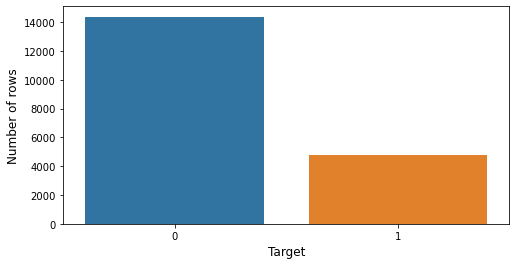

In [24]:
#0 not looking for job change
#1 looking for job change

plt.figure(figsize=(8, 4))
sns.barplot(x=train.target.value_counts().index.astype(int),
            y=train.target.value_counts().values)
plt.ylabel('Number of rows', fontsize=12)
plt.xlabel('Target', fontsize=12)
plt.show();

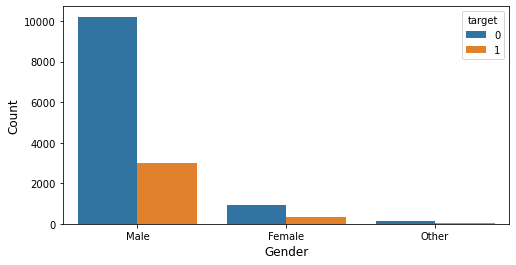

In [27]:
#Gender
plt.figure(figsize=(8, 4))
sns.countplot(x=train.gender, hue=train.target.astype(int))
plt.ylabel('Count', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.show();

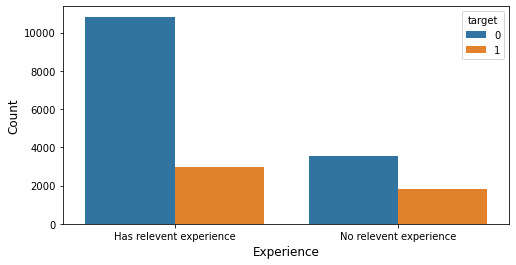

In [25]:
#Experience
plt.figure(figsize=(8, 4))
sns.countplot(x=train.relevent_experience, hue=train.target.astype(int))
plt.ylabel('Count', fontsize=12)
plt.xlabel('Experience', fontsize=12)
plt.show();

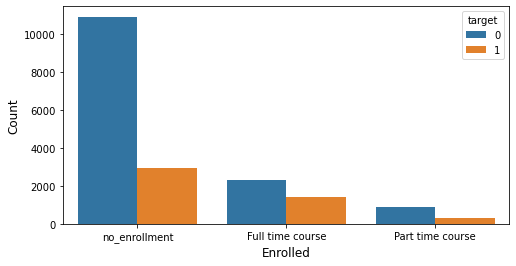

In [28]:
#Enrolled University
plt.figure(figsize=(8, 4))
sns.countplot(x=train.enrolled_university, hue=train.target.astype(int))
plt.ylabel('Count', fontsize=12)
plt.xlabel('Enrolled', fontsize=12)
plt.show();

In [50]:
train.head()

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,target
0,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,1.0
1,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,0.0
2,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,0.0
3,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,1.0
4,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,0.0


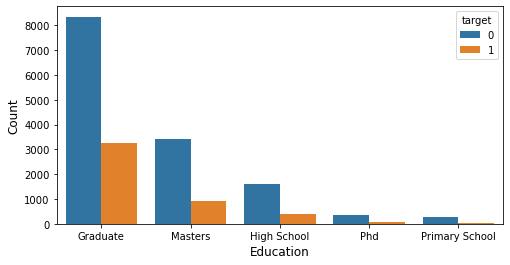

In [29]:
#Education Level
plt.figure(figsize=(8, 4))
sns.countplot(x=train.education_level, hue=train.target.astype(int))
plt.ylabel('Count', fontsize=12)
plt.xlabel('Education', fontsize=12)
plt.show();

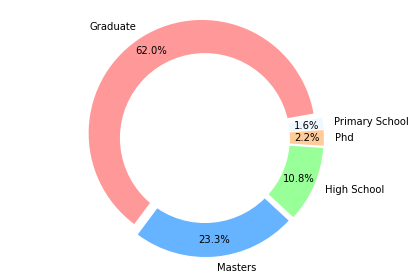

In [30]:
# pie chart

labels = train.education_level.value_counts().keys()
sizes = train.education_level.value_counts()

#add colors
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#f0f8ff']

#explsion
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=10, pctdistance=0.85, explode=explode,
        labeldistance=1.1)

centre_circle = plt.Circle((0, 0), 0.75, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

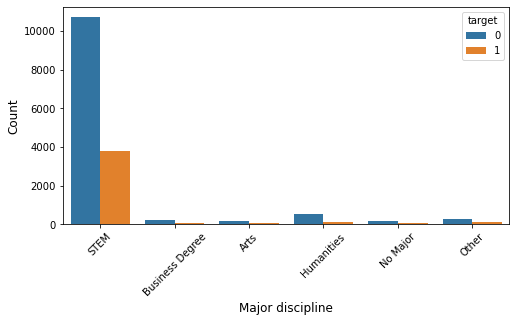

In [31]:
#Major Discipline
plt.figure(figsize=(8, 4))
sns.countplot(x=train.major_discipline, hue=train.target.astype(int))
plt.ylabel('Count', fontsize=12)
plt.xlabel('Major discipline', fontsize=12)
plt.xticks(rotation=45)
plt.show();

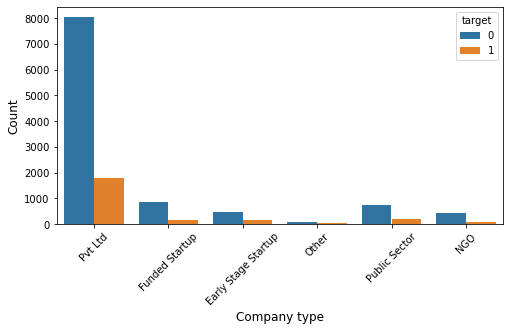

In [32]:
#Company Type
plt.figure(figsize=(8, 4))
sns.countplot(x=train.company_type, hue=train.target.astype(int))
plt.ylabel('Count', fontsize=12)
plt.xlabel('Company type', fontsize=12)
plt.xticks(rotation=45)
plt.show();

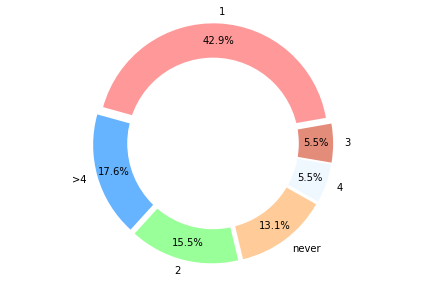

In [33]:
# pie chart

labels = train.last_new_job.value_counts().keys()
sizes = train.last_new_job.value_counts()

#add colors
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#f0f8ff', '#E38C79']

#explsion
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=10, pctdistance=0.85, explode=explode,
        labeldistance=1.1)

centre_circle = plt.Circle((0, 0), 0.75, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()


#number of years between current and last job

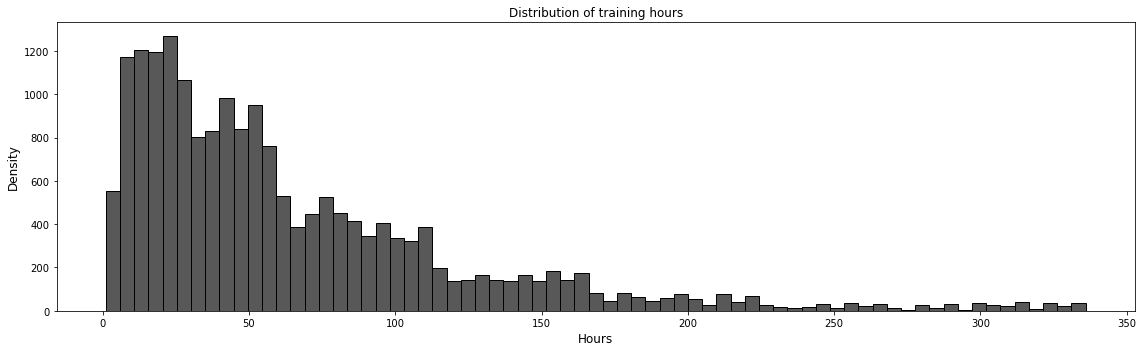

In [37]:
plt.figure(figsize=(16, 5))
sns.histplot(x=train.training_hours, color='#202020')
plt.title('Distribution of training hours')
plt.xlabel('Hours', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.tight_layout()
plt.show()

In [38]:
train = train.drop(['enrollee_id', 'city', 'city_development_index', 'training_hours'], axis=1)
test = test.drop(['enrollee_id', 'city', 'city_development_index', 'training_hours'], axis=1)

In [40]:
train.head()

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,target
0,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,1.0
1,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,0.0
2,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,0.0
3,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,1.0
4,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,0.0


In [41]:
print('Train NA values: \n', train.isnull().sum())
print('Test NA values: \n', test.isnull().sum())

Train NA values: 
 gender                 4508
relevent_experience       0
enrolled_university     386
education_level         460
major_discipline       2813
experience               65
company_size           5938
company_type           6140
last_new_job            423
target                    0
dtype: int64
Test NA values: 
 gender                 508
relevent_experience      0
enrolled_university     31
education_level         52
major_discipline       312
experience               5
company_size           622
company_type           634
last_new_job            40
dtype: int64


In [42]:
def impute_nan_most_frequent_category(DataFrame, ColName):
    # .mode()[0] - gives first category name
    most_frequent_category = DataFrame[ColName].mode()[0]

    # replace nan values with most occured category
    DataFrame[ColName].fillna(most_frequent_category, inplace=True)

In [43]:
for i in train.select_dtypes(include = "object").columns:
    impute_nan_most_frequent_category(train, i)

for i in test.select_dtypes(include = "object").columns:
    impute_nan_most_frequent_category(test, i)

In [44]:
print('Train NA values: \n', train.isnull().sum())
print('Test NA values: \n', test.isnull().sum())

Train NA values: 
 gender                 0
relevent_experience    0
enrolled_university    0
education_level        0
major_discipline       0
experience             0
company_size           0
company_type           0
last_new_job           0
target                 0
dtype: int64
Test NA values: 
 gender                 0
relevent_experience    0
enrolled_university    0
education_level        0
major_discipline       0
experience             0
company_size           0
company_type           0
last_new_job           0
dtype: int64


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               19158 non-null  object 
 1   relevent_experience  19158 non-null  object 
 2   enrolled_university  19158 non-null  object 
 3   education_level      19158 non-null  object 
 4   major_discipline     19158 non-null  object 
 5   experience           19158 non-null  object 
 6   company_size         19158 non-null  object 
 7   company_type         19158 non-null  object 
 8   last_new_job         19158 non-null  object 
 9   target               19158 non-null  float64
dtypes: float64(1), object(9)
memory usage: 1.5+ MB


In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   gender               2129 non-null   object
 1   relevent_experience  2129 non-null   object
 2   enrolled_university  2129 non-null   object
 3   education_level      2129 non-null   object
 4   major_discipline     2129 non-null   object
 5   experience           2129 non-null   object
 6   company_size         2129 non-null   object
 7   company_type         2129 non-null   object
 8   last_new_job         2129 non-null   object
dtypes: object(9)
memory usage: 149.8+ KB


In [47]:
objList = train.select_dtypes(include = "object").columns
print('Categorical columns: ', objList)

Categorical columns:  Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')
